### **Regression using numpy (with pandas and pyplot)**

<font color="red">File access required:</font> In Colab this notebook requires first uploading files **Cities.csv** and **Players.csv** using the *Files* feature in the left toolbar. If running the notebook on a local computer, simply ensure these files are in the same workspace as the notebook.

In [22]:
# Set-up
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
# Read Cities.csv into dataframe
f = open('Cities.csv')
cities = pd.read_csv(f)

In [24]:
cities.columns

Index(['city', 'country', 'latitude', 'longitude', 'temperature'], dtype='object')

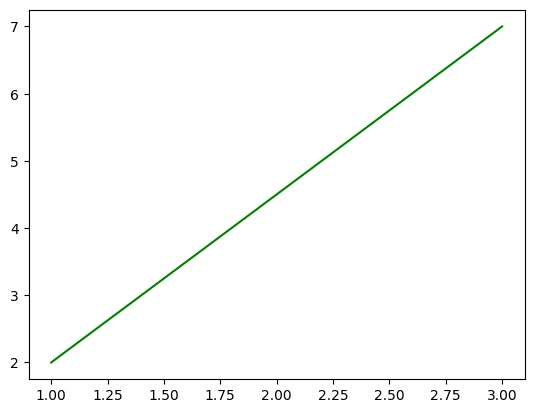

In [39]:
# Introduction to plotting a line
plt.plot([1,3], [2,7], color='green')
plt.show()

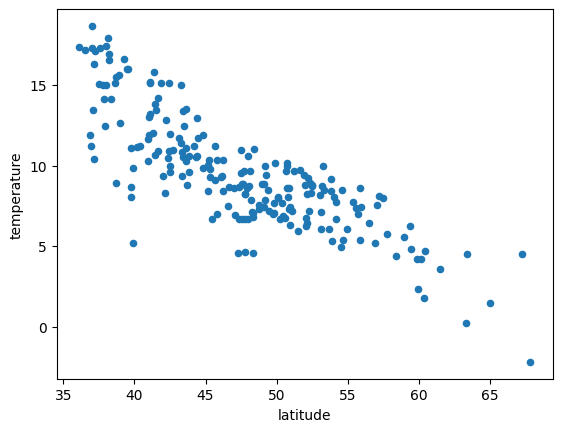

In [41]:
# Recall temperature versus latitude scatterplot
cities.plot.scatter('latitude', 'temperature')
plt.show()

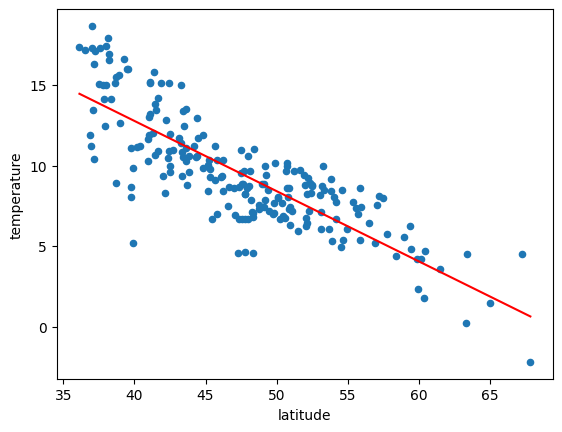

In [27]:
# Add linear regression
cities.plot.scatter('latitude', 'temperature')

a,b = np.polyfit(cities.latitude, cities.temperature, 1) # Regression line is y = mx + b

x1 = min(cities.latitude)
x2 = max(cities.latitude)

plt.plot([x1,x2], [a*x1 + b, a*x2 + b], color='red')
plt.show()

In [28]:
# Correlation coefficients (r values)
r = np.corrcoef(cities.latitude, cities.temperature)[1,0]
print('Correlation coefficient for temperature versus latitude:', r)

r = np.corrcoef(cities.longitude, cities.temperature)[1,0]
print('Correlation coefficient for temperature versus longitude:', r)

Correlation coefficient for temperature versus latitude: -0.8241046320267099
Correlation coefficient for temperature versus longitude: -0.16930750403617875


Training data:


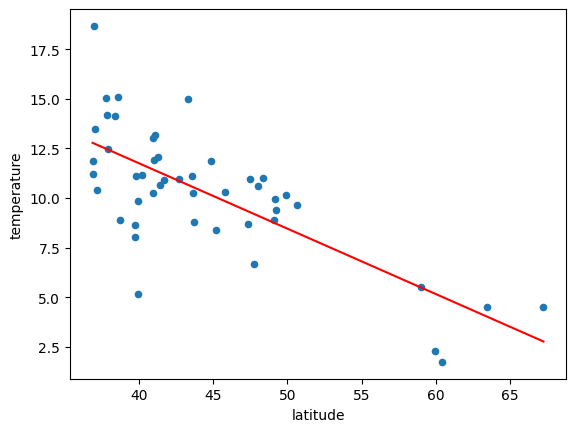

In [29]:
# Use linear regression for interactive temperature predictor
# Training data: compute and show latitude-temperature regression from cities
# in Norway, France, and Turkey
train = cities[ (cities.country=='Norway') | (cities.country=='France') | (cities.country=='Turkey')  ]
a,b = np.polyfit(train.latitude, train.temperature, 1) # y = mx + b = y = ax + b --->>>>> slope: a; intercept: b
print('Training data:')
train.plot.scatter('latitude', 'temperature')
x1 = min(train.latitude)
x2 = max(train.latitude)
plt.plot([x1,x2], [a*x1 + b, a*x2 + b], color='red')
plt.show()

In [30]:
train.head()

,city,country,latitude,longitude,temperature
3,Adana,Turkey,36.99,35.32,18.67
6,Amiens,France,49.90,2.30,10.17
10,Angers,France,47.48,-0.53,10.98
11,Ankara,Turkey,39.93,32.86,9.86
12,Antalya,Turkey,36.89,30.70,11.88


In [31]:
# Now loop asking for a city name; find the city's latitude, use the regression
# to predict the temperature, then check against the actual temperature.

while True:
    name = input('Enter city name (or "quit" to quit): ')

    if name == 'quit': break

    city = cities[cities.city == name]
    if len(city) == 0:
        print('City not in dataset')
    else:
        # Use float() to convert dataframe element to value
        print('Predicted temperature:', a * float(city.latitude) + b) # y = mx + b = y = ax + b --->>>>> slope: a; intercept: b -> trained from 3 cities only
        print('Actual temperature:', float(city.temperature))

Enter city name (or "quit" to quit): Cacau
City not in dataset
Enter city name (or "quit" to quit): quit


### <font color="green">**Your Turn: World Cup Data**</font>

In [32]:
# Read Players.csv into dataframe
f = open('Players.csv')
players = pd.read_csv(f)

 Passes vs Minutes


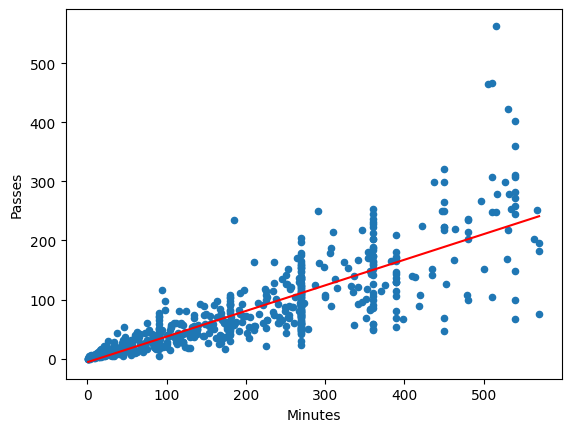

Regression equation: passes = 0.4333 * minutes + -5.9809


In [33]:
# From the players data, compute and plot a linear regression for
# passes made (y-axis) versus minutes played (x-axis).
print(" Passes vs Minutes")
players.plot.scatter('minutes', 'passes')

a, b = np.polyfit(players.minutes, players.passes, 1)
x1 = min(players.minutes)
x2 = max(players.minutes)

plt.plot([x1,x2], [a*x1 + b, a*x2 + b], color='red')
plt.xlabel('Minutes')
plt.ylabel('Passes')
plt.show()

print(f"Regression equation: passes = {a:.4f} * minutes + {b:.4f}")

In [34]:
# Show the correlation coefficients for four regressions:
# passes versus minutes, tackles versus minutes, shots versus minutes,
# and saves versus minutes. Make sure to label each one.
print("Correlation Coefficients")

r_passes = np.corrcoef(players.minutes, players.passes)[1,0]
print(f'Correlation coefficient for passes versus minutes: {r_passes:.4f}')

r_tackles = np.corrcoef(players.minutes, players.tackles)[1,0]
print(f'Correlation coefficient for tackles versus minutes: {r_tackles:.4f}')

r_shots = np.corrcoef(players.minutes, players.shots)[1,0]
print(f'Correlation coefficient for shots versus minutes: {r_shots:.4f}')

r_saves = np.corrcoef(players.minutes, players.saves)[1,0]
print(f'Correlation coefficient for saves vs minutes: {r_saves:.4f}')

Correlation Coefficients
Correlation coefficient for passes versus minutes: 0.8151
Correlation coefficient for tackles versus minutes: 0.6107
Correlation coefficient for shots versus minutes: 0.4079
Correlation coefficient for saves vs minutes: 0.2285


In [35]:
# BONUS!
# Repeat the previous problem, except consider each position separately.
# That is, show correlation coefficients separately for the forwards,
# midfielders, defenders, and goalkeepers. If you get a warning, you
# may hard-code the fact that only goalkeepers make saves.
print("Correlation Coefficients by Position")

positions = ['Forward', 'Midfielder', 'Defender', 'Goalkeeper']

for pos in ['forward', 'midfielder', 'defender', 'goalkeeper']:
    print(f'--- {pos.upper()} ---')
    subset = players[players.position == pos]


    if subset.passes.std() > 0:
        print('Passes:', np.corrcoef(subset.minutes, subset.passes)[1,0])
    if subset.tackles.std() > 0:
        print('Tackles:', np.corrcoef(subset.minutes, subset.tackles)[1,0])
    if subset.shots.std() > 0:
        print('Shots:', np.corrcoef(subset.minutes, subset.shots)[1,0])
    if subset.saves.std() > 0:
        print('Saves:', np.corrcoef(subset.minutes, subset.saves)[1,0])
    print()

Correlation Coefficients by Position
--- FORWARD ---
Passes: 0.8878879513279622
Tackles: 0.5747089226547138
Shots: 0.8481803964835185

--- MIDFIELDER ---
Passes: 0.865429580683516
Tackles: 0.7793091396604376
Shots: 0.5360369284446229

--- DEFENDER ---
Passes: 0.891885240439449
Tackles: 0.6959873475487464
Shots: 0.3623603154015943

--- GOALKEEPER ---
Passes: 0.8016811641352866
Tackles: 0.24793450789982802
Shots: -0.18926055771763878
Saves: 0.6201340576061031



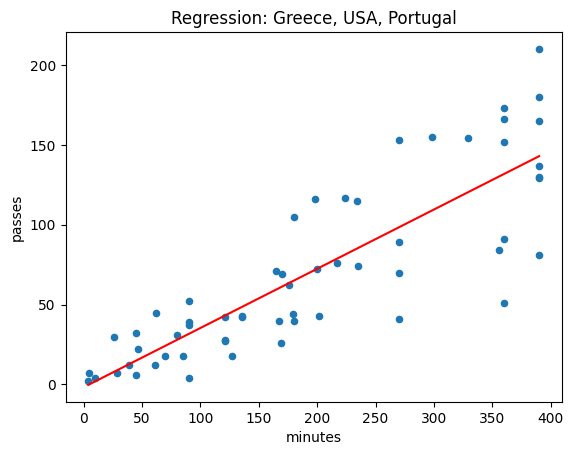

Regression equation: passes = 0.3709 * minutes + -1.7533


In [36]:
# Use linear regression for interactive number-of-passes predictor
# Training data: compute and show minutes-passes regression for players
# from Greece, USA, and Portugal

train = players[(players.team == 'Greece') | (players.team == 'USA') | (players.team == 'Portugal')]

#Compute the linear regression
a, b = np.polyfit(train.minutes, train.passes, 1)

#Plot the training data points
train.plot.scatter('minutes', 'passes', title='Regression: Greece, USA, Portugal')

#Calculate the start and end points for the regression line
x1 = min(train.minutes)
x2 = max(train.minutes)
y1 = a * x1 + b
y2 = a * x2 + b


plt.plot([x1, x2], [y1, y2], color='red')
plt.show()


print(f'Regression equation: passes = {a:.4f} * minutes + {b:.4f}')

In [37]:
# Now loop asking for a player's surname; find the number of minutes the
# player played, use the regression to predict the number of passes made,
# then check against the actual number.
#
# Once your predictor seems to be working, try surname Barry, Gomez, or Pepe.
# You probably get an error; figure out the underlying reason for the error,
# then modify your code so it prints a suitable message for surnames like these,
# instead of raising an error.

train = players[(players.team == 'Greece') | (players.team == 'USA') | (players.team == 'Portugal')]
a, b = np.polyfit(train.minutes, train.passes, 1)

while True:
    surname = input('Enter player surname (or "quit" to quit): ')
    if surname.lower() == 'quit':
        break


    player = players[players.surname == surname]


    if len(player) == 0:
        print(f"Error: No player found with surname '{surname}'.")

    elif len(player) > 1:

        print(f"Error: Multiple players found with surname '{surname}'.")
        print("Please be more specific. Matches found for teams:")
        for team in player.team:
            print(f" - {team}")

    else:

        mins = float(player.iloc[0].minutes)
        actual = float(player.iloc[0].passes)
        team = player.iloc[0].team

        prediction = a * mins + b

        print(f"Player found: {surname} ({team})")
        print(f"Minutes played: {mins}")
        print(f"Predicted passes: {prediction:.2f}")
        print(f"Actual passes: {actual}")
        print(f"Difference: {abs(prediction - actual):.2f}")
    print("-" * 30)

Enter player surname (or "quit" to quit): Cacau
Player found: Cacau (Germany)
Minutes played: 132.0
Predicted passes: 47.20
Actual passes: 54.0
Difference: 6.80
------------------------------
Enter player surname (or "quit" to quit): quit


In [38]:
# BONUS!
# Repeat previous but use separate predictors for the four different positions
# (forward,midfielder,defender,goalkeeper). Does it do better?
#
# Note: To extract a string value from a dataframe element use df.iloc[0].element,
# e.g., if "player" is a one-row dataframe, then player.iloc[0].position returns
# the player's position as a string

position_models = {}
positions = ['forward', 'midfielder', 'defender', 'goalkeeper']

for pos in positions:
    #Get only the players for this position
    subset = players[players.position == pos]
    #Calculate linear regression: passes = a * minutes + b
    a_pos, b_pos = np.polyfit(subset.minutes, subset.passes, 1)
    position_models[pos] = (a_pos, b_pos)

#Loop
while True:
    name = input('Enter player surname (or "quit" to quit): ')
    if name == 'quit': break

    player = players[players.surname == name]

    if len(player) == 0:
        print('Player not in dataset')
    elif len(player) > 1:
        print(f'Multiple players found with surname "{name}".')
    else:
        #Get player data
        minutes = float(player.iloc[0].minutes)
        actual_passes = float(player.iloc[0].passes)
        pos = player.iloc[0].position

        #Get the specific model for this player's position
        a_pos, b_pos = position_models[pos]

        #Predict
        prediction = a_pos * minutes + b_pos

        print(f'Position: {pos}')
        print(f'Predicted passes: {prediction:.2f}')
        print(f'Actual passes: {actual_passes}')
        print(f'Difference: {abs(prediction - actual_passes):.2f}')

Enter player surname (or "quit" to quit): Cacau
Position: forward
Predicted passes: 38.90
Actual passes: 54.0
Difference: 15.10
Enter player surname (or "quit" to quit): quit
